In [27]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pystan

sns.set()

In [33]:
model_code_linreg = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}
model {
    y ~ normal(alpha + beta * x, sigma);
}
"""
model_linreg = pystan.StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cb4cc9c2a04d0e34d711077557307fb7 NOW.


In [38]:
# Parameters to be inferred
alpha = 4.0
beta = 0.5
sigma = 1.0

# Generate and plot data
x = 10 * np.random.rand(500)
y = alpha + beta * x
y = np.random.normal(y, scale=sigma)

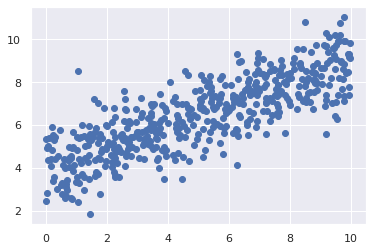

In [39]:
plt.scatter(x, y)

In [40]:
data_linreg = {'N':len(x), 'x':x, 'y':y}
fit_linreg = model.sampling(
    data=data_linreg, iter=1000, chains=4,warmup=500, thin=2, seed=101
)

In [41]:
fit_linreg

Inference for Stan model: anon_model_cb4cc9c2a04d0e34d711077557307fb7.
4 chains, each with iter=1000; warmup=500; thin=2; 
post-warmup draws per chain=250, total post-warmup draws=1000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   3.99  3.2e-3   0.09   3.81   3.94   3.99   4.05   4.16    752    1.0
beta    0.49  5.6e-4   0.02   0.46   0.48   0.49    0.5   0.52    738    1.0
sigma   1.01  1.0e-3   0.03   0.95   0.99   1.01   1.03   1.08    920    1.0
lp__  -256.1    0.05   1.17 -259.1 -256.6 -255.8 -255.2 -254.8    589    1.0

Samples were drawn using NUTS at Fri Jul  3 21:24:55 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).